# Customer analysis case study

What have I done so far?
<br>•	Importing libraries
<br>•	Loading Data individually
<br>•	Checking the homogeneity of the headers, nomenclature, sequence and size by listing individual dfs
<br>•	Checking the data type and non-null record count for individual dfs
<br>•	Comparing the column label discrepancies with the help of sets
<br>•	Standardizing the column headers by renaming, replace spaces with underscores and converting to lowercase
<br>•	Data type in df1 and df2 for Customer lifetime Value column needs to converted from object to float
<br>•	Aggregation of data into one Data Frame using Pandas
<br>•	Removing duplicate records and customer column as these does not add any value for analysis
<br>•	Cleaning up the customer lifetime value by replacing NaN with mean values
<br>•	cleaning up the income values
<br>•	Data clean up of Number of open complaints
<br>•	Checking unique strings of series for nomenclature standardisation (including changing text to lowercase)
<br>•	Standardizing the elements in each series or columns


####•	Using the new file with response and sales channel as dataframe 4 named as df4.
<br>This file df4 will be basis for further analysis for matplotlib etc.,

<br>•	Repeated the same steps as above to the new data frame.

<br>•	Additionally, plotted the graphs as instructed in Activity

## Methods or functions used:
<br>set(df1.columns) ^ set(df2.columns)
<br>df1.rename(columns={"ST":"state"}, inplace=True )
<br>df3.columns = df3.columns.str.replace(' ','_')
<br>df1.columns=[i.lower() for i in df1.columns]
<br>df1.customer_lifetime_value =df1.customer_lifetime_value.str.replace("%","").astype('float')/1000)
<br>ca_df= pd.concat([df1,df2,df3], axis= 0).reset_index(drop=True)
<br>ca_df= ca_df.drop(['customer'], axis=1)
<br>ca_df_unique = ca_df.drop_duplicates()
<br>state_nan_mask = ca_df_unique.state.isna() to check the nan-values
<br>ca_df_unique[state_nan_mask]
<br># filling NaN values with the mean of the series.
<br>ca_df_unique.customer_lifetime_value = ca_df_unique.customer_lifetime_value.replace(np.NaN,clv_mean)
<br>## by replacing zeros first with NaN and then with mean values
<br>ca_df_unique["income"]= <br>ca_df_unique["income"].where(ca_df_unique["income"]!=0).dropna()
<br> ca_df_unique.gender.fillna('unknown',inplace = True) # replacing the Nan with 'unknown'
<br>ca_df_unique["region"] = ca_df_unique["state"].map(region_mapping_dict)




### Importing libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Loading Data

In [104]:
ls

 Volume in drive C is OS
 Volume Serial Number is 303D-C5F3

 Directory of C:\Users\Josephine\data\week 2 Customer analysis case study\Data

28/10/2021  13:35    <DIR>          .
28/10/2021  13:35    <DIR>          ..
27/10/2021  13:39    <DIR>          .ipynb_checkpoints
25/10/2021  09:50           145.932 file1.csv
25/10/2021  09:50            92.344 file2.csv
25/10/2021  09:50           625.674 file3.csv
27/10/2021  15:17         1.042.297 file4.csv
27/10/2021  13:39         1.129.969 Notebook_Code_Along_RH_Pandas_Data_Frame_General-Part_2-Structure.ipynb
27/10/2021  12:41            85.750 Untitled.ipynb
28/10/2021  13:35           827.471 week_2 Customer analysis case study.ipynb
28/10/2021  13:26            14.887 What have I done so far.docx
               8 File(s)      3.964.324 bytes
               3 Dir(s)  11.691.286.528 bytes free


In [6]:
# Reading the data files individually and creating individual dataframes namely df1, df2 and df3
df1= pd.read_csv('file1.csv')
df2= pd.read_csv('file2.csv')
df3= pd.read_csv('file3.csv')

### Checking the homogenity of the headers, nomenclature, sequence and size by listing individual dfs

In [7]:
# Printing the file size to check the record size and the column homogenity
print(df1.shape)
print(df2.shape)
print(df3.shape)

(4008, 11)
(996, 11)
(7070, 11)


In [8]:
df1.head(2) # printing the file to view the headers

,Customer,ST,GENDER,Education,Customer Lifetime Value,Income,Monthly Premium Auto,Number of Open Complaints,Policy Type,Vehicle Class,Total Claim Amount
0,RB50392,Washington,NaN,Master,NaN,0.0,1000.0,1/0/00,Personal Auto,Four-Door Car,2.704934
1,QZ44356,Arizona,F,Bachelor,697953.59%,0.0,94.0,1/0/00,Personal Auto,Four-Door Car,1131.464935


In [9]:
df2.head(2)

,Customer,ST,GENDER,Education,Customer Lifetime Value,Income,Monthly Premium Auto,Number of Open Complaints,Total Claim Amount,Policy Type,Vehicle Class
0,GS98873,Arizona,F,Bachelor,323912.47%,16061,88,1/0/00,633.6,Personal Auto,Four-Door Car
1,CW49887,California,F,Master,462680.11%,79487,114,1/0/00,547.2,Special Auto,SUV


In [10]:
df3.head(2)

,Customer,State,Customer Lifetime Value,Education,Gender,Income,Monthly Premium Auto,Number of Open Complaints,Policy Type,Total Claim Amount,Vehicle Class
0,SA25987,Washington,3479.137523,High School or Below,M,0,104,0,Personal Auto,499.200000,Two-Door Car
1,TB86706,Arizona,2502.637401,Master,M,0,66,0,Personal Auto,3.468912,Two-Door Car


### Checking the data type and non-null record count for individual dfs

In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4008 entries, 0 to 4007
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Customer                   1071 non-null   object 
 1   ST                         1071 non-null   object 
 2   GENDER                     954 non-null    object 
 3   Education                  1071 non-null   object 
 4   Customer Lifetime Value    1068 non-null   object 
 5   Income                     1071 non-null   float64
 6   Monthly Premium Auto       1071 non-null   float64
 7   Number of Open Complaints  1071 non-null   object 
 8   Policy Type                1071 non-null   object 
 9   Vehicle Class              1071 non-null   object 
 10  Total Claim Amount         1071 non-null   float64
dtypes: float64(3), object(8)
memory usage: 344.6+ KB


In [12]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 996 entries, 0 to 995
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Customer                   996 non-null    object 
 1   ST                         996 non-null    object 
 2   GENDER                     991 non-null    object 
 3   Education                  996 non-null    object 
 4   Customer Lifetime Value    992 non-null    object 
 5   Income                     996 non-null    int64  
 6   Monthly Premium Auto       996 non-null    int64  
 7   Number of Open Complaints  996 non-null    object 
 8   Total Claim Amount         996 non-null    float64
 9   Policy Type                996 non-null    object 
 10  Vehicle Class              996 non-null    object 
dtypes: float64(1), int64(2), object(8)
memory usage: 85.7+ KB


In [13]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7070 entries, 0 to 7069
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Customer                   7070 non-null   object 
 1   State                      7070 non-null   object 
 2   Customer Lifetime Value    7070 non-null   float64
 3   Education                  7070 non-null   object 
 4   Gender                     7070 non-null   object 
 5   Income                     7070 non-null   int64  
 6   Monthly Premium Auto       7070 non-null   int64  
 7   Number of Open Complaints  7070 non-null   int64  
 8   Policy Type                7070 non-null   object 
 9   Total Claim Amount         7070 non-null   float64
 10  Vehicle Class              7070 non-null   object 
dtypes: float64(2), int64(3), object(6)
memory usage: 607.7+ KB


### Comparing the column label discrepancies with the help of sets

In [14]:
# comparing the columns in the dataframes 1 & 2. It is good
set(df1.columns) ^ set(df2.columns)

set()

In [15]:
# comparing the columns in the dataframes 1 & 3. Two column headers need to be modified
set(df1.columns) ^ set(df3.columns)

{'GENDER', 'Gender', 'ST', 'State'}

#### observation: Column names needs to be standardized, order of the label needs to be changed.<br> data type in df1 and df2 for Customer lifetime Value and number of open complaints columns need to be changed to float

### Standardizing the column headers by renaming, replace spaces with underscores and changing cases to lowercase

In [16]:
#renaming the inconsistent column header
df1.rename(columns={"ST":"state"}, inplace=True )
df2.rename(columns={"ST":"state"}, inplace=True )
# replacing spaces in columns name with underscores for effective coding
df1.columns = df1.columns.str.replace(' ','_')
df2.columns = df2.columns.str.replace(' ','_')
df3.columns = df3.columns.str.replace(' ','_')

# changing the column headers to lower case
df1.columns=[i.lower() for i in df1.columns]
df2.columns=[i.lower() for i in df2.columns]
df3.columns=[i.lower() for i in df3.columns]

In [17]:
# comparing the columns to confirm any inconsistencies in the dataframes 1 & 3.
set(df1.columns) ^ set(df3.columns)

set()

#### Data type in df1 and df2 for Customer lifetime Value column needs to converted from object to float

In [18]:
# reformatting the customer_lifetime_value series on file 1 and file 2 to float
df1.customer_lifetime_value = (df1.customer_lifetime_value.str.replace("%","").astype('float')/1000)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4008 entries, 0 to 4007
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customer                   1071 non-null   object 
 1   state                      1071 non-null   object 
 2   gender                     954 non-null    object 
 3   education                  1071 non-null   object 
 4   customer_lifetime_value    1068 non-null   float64
 5   income                     1071 non-null   float64
 6   monthly_premium_auto       1071 non-null   float64
 7   number_of_open_complaints  1071 non-null   object 
 8   policy_type                1071 non-null   object 
 9   vehicle_class              1071 non-null   object 
 10  total_claim_amount         1071 non-null   float64
dtypes: float64(4), object(7)
memory usage: 344.6+ KB


In [19]:
df2.customer_lifetime_value = (df2.customer_lifetime_value.str.replace("%","").astype('float')/1000)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 996 entries, 0 to 995
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customer                   996 non-null    object 
 1   state                      996 non-null    object 
 2   gender                     991 non-null    object 
 3   education                  996 non-null    object 
 4   customer_lifetime_value    992 non-null    float64
 5   income                     996 non-null    int64  
 6   monthly_premium_auto       996 non-null    int64  
 7   number_of_open_complaints  996 non-null    object 
 8   total_claim_amount         996 non-null    float64
 9   policy_type                996 non-null    object 
 10  vehicle_class              996 non-null    object 
dtypes: float64(2), int64(2), object(7)
memory usage: 85.7+ KB


###  Aggregation of data into one Data Frame using Pandas.

In [20]:
#concatenating the data sets into one DataFrame called ca_df with 12074 rows × 11 columns
ca_df= pd.concat([df1,df2,df3], axis= 0).reset_index(drop=True) #also resetting the index
ca_df

,customer,state,gender,education,customer_lifetime_value,income,monthly_premium_auto,number_of_open_complaints,policy_type,vehicle_class,total_claim_amount
0,RB50392,Washington,NaN,Master,NaN,0.0,1000.0,1/0/00,Personal Auto,Four-Door Car,2.704934
1,QZ44356,Arizona,F,Bachelor,697.953590,0.0,94.0,1/0/00,Personal Auto,Four-Door Car,1131.464935
2,AI49188,Nevada,F,Bachelor,1288.743170,48767.0,108.0,1/0/00,Personal Auto,Two-Door Car,566.472247
3,WW63253,California,M,Bachelor,764.586180,0.0,106.0,1/0/00,Corporate Auto,SUV,529.881344
4,GA49547,Washington,M,High School or Below,536.307650,36357.0,68.0,1/0/00,Personal Auto,Four-Door Car,17.269323
...,...,...,...,...,...,...,...,...,...,...,...
12069,LA72316,California,M,Bachelor,23405.987980,71941.0,73.0,0,Personal Auto,Four-Door Car,198.234764
12070,PK87824,California,F,College,3096.511217,21604.0,79.0,0,Corporate Auto,Four-Door Car,379.200000
12071,TD14365,California,M,Bachelor,8163.890428,0.0,85.0,3,Corporate Auto,Four-Door Car,790.784983
12072,UP19263,California,M,College,7524.442436,21941.0,96.0,0,Personal Auto,Four-Door Car,691.200000


#### Removing duplicate records and customer column as these does not add any value for analysis

In [21]:
ca_df= ca_df.drop(['customer'], axis=1)
ca_df_unique = ca_df.drop_duplicates()
ca_df_unique= ca_df_unique.reset_index(drop=True)

In [22]:
#viewing the non-duplicate records, which counts to 8882
ca_df_unique

,state,gender,education,customer_lifetime_value,income,monthly_premium_auto,number_of_open_complaints,policy_type,vehicle_class,total_claim_amount
0,Washington,NaN,Master,NaN,0.0,1000.0,1/0/00,Personal Auto,Four-Door Car,2.704934
1,Arizona,F,Bachelor,697.953590,0.0,94.0,1/0/00,Personal Auto,Four-Door Car,1131.464935
2,Nevada,F,Bachelor,1288.743170,48767.0,108.0,1/0/00,Personal Auto,Two-Door Car,566.472247
3,California,M,Bachelor,764.586180,0.0,106.0,1/0/00,Corporate Auto,SUV,529.881344
4,Washington,M,High School or Below,536.307650,36357.0,68.0,1/0/00,Personal Auto,Four-Door Car,17.269323
...,...,...,...,...,...,...,...,...,...,...
8877,California,M,Bachelor,23405.987980,71941.0,73.0,0,Personal Auto,Four-Door Car,198.234764
8878,California,F,College,3096.511217,21604.0,79.0,0,Corporate Auto,Four-Door Car,379.200000
8879,California,M,Bachelor,8163.890428,0.0,85.0,3,Corporate Auto,Four-Door Car,790.784983
8880,California,M,College,7524.442436,21941.0,96.0,0,Personal Auto,Four-Door Car,691.200000


In [23]:
# to retrieve the number of null value for state
state_nan_mask = ca_df_unique.state.isna() 
ca_df_unique[state_nan_mask] # other columns also had NaN, hence removing the rows


,state,gender,education,customer_lifetime_value,income,monthly_premium_auto,number_of_open_complaints,policy_type,vehicle_class,total_claim_amount
1070,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
# deleting the row with NaN and resetting the index
ca_df_unique = ca_df_unique.drop([1070],axis=0).reset_index(drop=True)

In [25]:
ca_df_unique.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8881 entries, 0 to 8880
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   state                      8881 non-null   object 
 1   gender                     8759 non-null   object 
 2   education                  8881 non-null   object 
 3   customer_lifetime_value    8874 non-null   float64
 4   income                     8881 non-null   float64
 5   monthly_premium_auto       8881 non-null   float64
 6   number_of_open_complaints  8881 non-null   object 
 7   policy_type                8881 non-null   object 
 8   vehicle_class              8881 non-null   object 
 9   total_claim_amount         8881 non-null   float64
dtypes: float64(4), object(6)
memory usage: 694.0+ KB


In [26]:
ca_df_unique # income values shows 0.0 although the total records and non-null records match

,state,gender,education,customer_lifetime_value,income,monthly_premium_auto,number_of_open_complaints,policy_type,vehicle_class,total_claim_amount
0,Washington,NaN,Master,NaN,0.0,1000.0,1/0/00,Personal Auto,Four-Door Car,2.704934
1,Arizona,F,Bachelor,697.953590,0.0,94.0,1/0/00,Personal Auto,Four-Door Car,1131.464935
2,Nevada,F,Bachelor,1288.743170,48767.0,108.0,1/0/00,Personal Auto,Two-Door Car,566.472247
3,California,M,Bachelor,764.586180,0.0,106.0,1/0/00,Corporate Auto,SUV,529.881344
4,Washington,M,High School or Below,536.307650,36357.0,68.0,1/0/00,Personal Auto,Four-Door Car,17.269323
...,...,...,...,...,...,...,...,...,...,...
8876,California,M,Bachelor,23405.987980,71941.0,73.0,0,Personal Auto,Four-Door Car,198.234764
8877,California,F,College,3096.511217,21604.0,79.0,0,Corporate Auto,Four-Door Car,379.200000
8878,California,M,Bachelor,8163.890428,0.0,85.0,3,Corporate Auto,Four-Door Car,790.784983
8879,California,M,College,7524.442436,21941.0,96.0,0,Personal Auto,Four-Door Car,691.200000


In [27]:
#### Observations: 
#### 1. Income values shows 0.0 although the total records and non-null records match
#### 2. number_of_open_complaints data type needs to be formatted as the data is in date format


#### Cleaning up the customer lifetime value by replacing NaN with mean values

In [28]:
clv_mean = ca_df_unique.customer_lifetime_value.mean() 
# checking the mean value before imputing the null values
clv_mean

6365.453035476795

In [29]:
# filling NaN values with the mean of the series.
ca_df_unique.customer_lifetime_value = ca_df_unique.customer_lifetime_value.replace(np.NaN,clv_mean) 
# checking the mean for the series to make sure the value remains the same as before
ca_df_unique.customer_lifetime_value.mean() 

6365.453035476793

#### cleaning up the income values 

In [30]:
ca_df_unique.income.mean() # ignoring this mean as this is incorrect, which counts 0 also as a value.

37821.02871298277

In [31]:
## by replacing zeros first with NaN and then with mean values
ca_df_unique["income"]= ca_df_unique["income"].where(ca_df_unique["income"]!=0).dropna()
ca_df_unique.income.mean() # mean values without including zeros

50707.813405797104

In [32]:
ca_df_unique.income= ca_df_unique.income.fillna(ca_df_unique.income.mean()) # imputing mean values to NaN
ca_df_unique.income.mean()

50707.81340579979

In [33]:
ca_df_unique # checking the df for expexted results for customer lifetime value.

,state,gender,education,customer_lifetime_value,income,monthly_premium_auto,number_of_open_complaints,policy_type,vehicle_class,total_claim_amount
0,Washington,NaN,Master,6365.453035,50707.813406,1000.0,1/0/00,Personal Auto,Four-Door Car,2.704934
1,Arizona,F,Bachelor,697.953590,50707.813406,94.0,1/0/00,Personal Auto,Four-Door Car,1131.464935
2,Nevada,F,Bachelor,1288.743170,48767.000000,108.0,1/0/00,Personal Auto,Two-Door Car,566.472247
3,California,M,Bachelor,764.586180,50707.813406,106.0,1/0/00,Corporate Auto,SUV,529.881344
4,Washington,M,High School or Below,536.307650,36357.000000,68.0,1/0/00,Personal Auto,Four-Door Car,17.269323
...,...,...,...,...,...,...,...,...,...,...
8876,California,M,Bachelor,23405.987980,71941.000000,73.0,0,Personal Auto,Four-Door Car,198.234764
8877,California,F,College,3096.511217,21604.000000,79.0,0,Corporate Auto,Four-Door Car,379.200000
8878,California,M,Bachelor,8163.890428,50707.813406,85.0,3,Corporate Auto,Four-Door Car,790.784983
8879,California,M,College,7524.442436,21941.000000,96.0,0,Personal Auto,Four-Door Car,691.200000


#### Data cleanup- Number of open complaints

In [34]:
# cleaning the formatting of the Number of open complaints from an object to float by using the "/" as delimiters 
# and fetching the numerical value between the two "/".
ca_df_unique.number_of_open_complaints = ca_df_unique.number_of_open_complaints.apply(lambda x: np.array(x.split("/"), dtype=int)[1] if type(x)==str else x)

#### Checking unique strings of series for nomenclature standardisation (including changing text to lowercase)

In [35]:
ca_df_unique.state.unique() # checking unique records

array(['Washington', 'Arizona', 'Nevada', 'California', 'Oregon', 'Cali',
       'AZ', 'WA'], dtype=object)

In [36]:
ca_df_unique.gender.unique() # checking unique records

array([nan, 'F', 'M', 'Femal', 'Male', 'female'], dtype=object)

In [37]:
ca_df_unique.education.unique() # checking unique records

array(['Master', 'Bachelor', 'High School or Below', 'College',
       'Bachelors', 'Doctor'], dtype=object)

In [38]:
ca_df_unique.policy_type = ca_df_unique.policy_type.str.lower() # changing the text case to lower
ca_df_unique.policy_type.unique()

array(['personal auto', 'corporate auto', 'special auto'], dtype=object)

In [39]:
ca_df_unique.vehicle_class = ca_df_unique.vehicle_class.str.lower() # changing the text case to lower
ca_df_unique.vehicle_class.unique()

array(['four-door car', 'two-door car', 'suv', 'luxury suv', 'sports car',
       'luxury car'], dtype=object)

#### Standardizing the elements in each series or columns

In [40]:
#standardizing the nomenclature of the element in State column
ca_df_unique.state = ca_df_unique.state.str.lower()
ca_df_unique.state = ca_df_unique.state.replace(['cali','az', 'wa'],['california','arizona', 'washington']) 
ca_df_unique.state.unique()

array(['washington', 'arizona', 'nevada', 'california', 'oregon'],
      dtype=object)

In [41]:
#standardizing the nomenclature of the element in Gender column
ca_df_unique.gender = ca_df_unique.gender.replace(['Male','M'],'male') 
ca_df_unique.gender = ca_df_unique.gender.replace(['F','Femal'],'female')
ca_df_unique.gender.fillna('unknown',inplace = True) # replacing the Nan with 'unknown'
ca_df_unique.gender.value_counts()

female     4482
male       4277
unknown     122
Name: gender, dtype: int64

In [42]:
ca_df_unique.education= ca_df_unique.education.str.lower() # changing the text case to lower
ca_df_unique.education = ca_df_unique.education.replace(['bachelors'],'bachelor')
ca_df_unique.education.value_counts()

bachelor                2679
college                 2594
high school or below    2550
master                   727
doctor                   331
Name: education, dtype: int64

#### Bucketing the data: 
#### Write a function to replace column "State" to different zones. <br>California as West Region, Oregon as North West, and Washington as East, and Arizona and Nevada as Central

In [43]:
# defining the definition of region in a dictionary
region_mapping_dict = {
    "california": "west",
    "oregon" : "north_west",
    "washington": "east",
    "arizona" : "central",
    "nevada" : "central"
}

In [44]:
ca_df_unique["region"] = ca_df_unique["state"].map(region_mapping_dict)
ca_df_unique

,state,gender,education,customer_lifetime_value,income,monthly_premium_auto,number_of_open_complaints,policy_type,vehicle_class,total_claim_amount,region
0,washington,unknown,master,6365.453035,50707.813406,1000.0,0,personal auto,four-door car,2.704934,east
1,arizona,female,bachelor,697.953590,50707.813406,94.0,0,personal auto,four-door car,1131.464935,central
2,nevada,female,bachelor,1288.743170,48767.000000,108.0,0,personal auto,two-door car,566.472247,central
3,california,male,bachelor,764.586180,50707.813406,106.0,0,corporate auto,suv,529.881344,west
4,washington,male,high school or below,536.307650,36357.000000,68.0,0,personal auto,four-door car,17.269323,east
...,...,...,...,...,...,...,...,...,...,...,...
8876,california,male,bachelor,23405.987980,71941.000000,73.0,0,personal auto,four-door car,198.234764,west
8877,california,female,college,3096.511217,21604.000000,79.0,0,corporate auto,four-door car,379.200000,west
8878,california,male,bachelor,8163.890428,50707.813406,85.0,3,corporate auto,four-door car,790.784983,west
8879,california,male,college,7524.442436,21941.000000,96.0,0,personal auto,four-door car,691.200000,west


#### Using the new file with response and sales channel as dataframe 4 named as df4. <br> This file df4 will be basis for further analysis for matplotlib etc.,

In [45]:
# Reading the csv data file with df4 as the name
df4= pd.read_csv('file4.csv')
df4.head()

,Unnamed: 0,state,customer lifetime value,education,gender,income,monthly premium auto,number of open complaints,policy type,total claim amount,vehicle class,sales channel,response
0,0,Arizona,4809.216960,College,M,48029,61,0.0,Corporate Auto,292.800000,Four-Door Car,Agent,No
1,1,California,2228.525238,College,F,0,64,0.0,Personal Auto,744.924331,Four-Door Car,Call Center,No
2,2,Washington,14947.917300,Bachelor,M,22139,100,0.0,Personal Auto,480.000000,SUV,Call Center,No
3,3,Oregon,22332.439460,College,M,49078,97,0.0,Corporate Auto,484.013411,Four-Door Car,Branch,Yes
4,4,Oregon,9025.067525,Bachelor,F,23675,117,NaN,Personal Auto,707.925645,Four-Door Car,Branch,No


In [46]:
# dropping the firt column named 'Unnamed: 0', I don't see any value in this series.
df4 = df4.drop(df4.columns[[0]], axis=1) # dropping this series, the size is 10910 rows × 12 columns

In [47]:
df4= df4.drop_duplicates() # droping duplicates
df4

,state,customer lifetime value,education,gender,income,monthly premium auto,number of open complaints,policy type,total claim amount,vehicle class,sales channel,response
0,Arizona,4809.216960,College,M,48029,61,0.0,Corporate Auto,292.800000,Four-Door Car,Agent,No
1,California,2228.525238,College,F,0,64,0.0,Personal Auto,744.924331,Four-Door Car,Call Center,No
2,Washington,14947.917300,Bachelor,M,22139,100,0.0,Personal Auto,480.000000,SUV,Call Center,No
3,Oregon,22332.439460,College,M,49078,97,0.0,Corporate Auto,484.013411,Four-Door Car,Branch,Yes
4,Oregon,9025.067525,Bachelor,F,23675,117,NaN,Personal Auto,707.925645,Four-Door Car,Branch,No
...,...,...,...,...,...,...,...,...,...,...,...,...
10905,Nevada,15563.369440,Bachelor,F,0,253,NaN,Personal Auto,1214.400000,Luxury Car,Web,No
10906,Oregon,5259.444853,College,F,61146,65,0.0,Personal Auto,273.018929,Four-Door Car,Branch,No
10907,Arizona,23893.304100,Bachelor,F,39837,201,0.0,Corporate Auto,381.306996,Luxury SUV,Web,No
10908,California,11971.977650,College,F,64195,158,4.0,Personal Auto,618.288849,SUV,Branch,No


In [48]:
# replacing spaces in columns name with underscores for effective coding
df4.columns = df4.columns.str.replace(' ','_')

# changing the column headers to lower case
df4.columns=[i.lower() for i in df4.columns]

In [49]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10475 entries, 0 to 10909
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   state                      9867 non-null   object 
 1   customer_lifetime_value    10475 non-null  float64
 2   education                  10475 non-null  object 
 3   gender                     10475 non-null  object 
 4   income                     10475 non-null  int64  
 5   monthly_premium_auto       10475 non-null  int64  
 6   number_of_open_complaints  9859 non-null   float64
 7   policy_type                10475 non-null  object 
 8   total_claim_amount         10475 non-null  float64
 9   vehicle_class              9881 non-null   object 
 10  sales_channel              10475 non-null  object 
 11  response                   9867 non-null   object 
dtypes: float64(3), int64(2), object(7)
memory usage: 1.0+ MB


In [50]:
state_nan = df4.state.isna() # there are 608 rows, NaN values in State, which is filled with unknown as value
df4[state_nan]

,state,customer_lifetime_value,education,gender,income,monthly_premium_auto,number_of_open_complaints,policy_type,total_claim_amount,vehicle_class,sales_channel,response
5,NaN,4745.181764,High School or Below,M,50549,61,0.0,Personal Auto,292.800000,Four-Door Car,Agent,NaN
11,NaN,2420.711888,Bachelor,M,31710,62,0.0,Corporate Auto,199.551735,Two-Door Car,Call Center,NaN
58,NaN,14019.833140,College,M,31739,71,0.0,Personal Auto,469.882367,Two-Door Car,Call Center,NaN
62,NaN,2108.493744,Bachelor,M,0,61,0.0,Personal Auto,351.856810,Two-Door Car,Agent,NaN
126,NaN,4716.264294,High School or Below,M,25746,61,1.0,Corporate Auto,292.800000,Four-Door Car,Agent,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
10837,NaN,4978.950257,Bachelor,M,28695,64,0.0,Corporate Auto,221.241837,Four-Door Car,Branch,NaN
10849,NaN,5308.617246,Bachelor,M,40178,136,0.0,Special Auto,652.800000,SUV,Agent,NaN
10874,NaN,10036.536340,High School or Below,F,0,134,1.0,Personal Auto,1353.289060,SUV,Call Center,NaN
10894,NaN,6314.492009,Master,F,66947,78,0.0,Personal Auto,374.400000,Four-Door Car,Agent,NaN


In [51]:
# Similarly there are 616 elements under number_of_open_complaints, which will be filled with 0. 
# Assumption that when there is no complaints, the value is left blank
complaints_nan = df4.number_of_open_complaints.isna() 
df4[complaints_nan]

,state,customer_lifetime_value,education,gender,income,monthly_premium_auto,number_of_open_complaints,policy_type,total_claim_amount,vehicle_class,sales_channel,response
4,Oregon,9025.067525,Bachelor,F,23675,117,NaN,Personal Auto,707.925645,Four-Door Car,Branch,No
23,California,5107.071054,Bachelor,M,70174,64,NaN,Personal Auto,128.900320,Four-Door Car,Agent,No
51,Arizona,2590.096027,High School or Below,M,22398,67,NaN,Personal Auto,321.600000,Four-Door Car,Agent,No
59,Arizona,5575.751228,High School or Below,M,91416,69,NaN,Personal Auto,109.904496,Four-Door Car,Call Center,No
67,Washington,7507.455372,College,M,60920,64,NaN,Personal Auto,231.201886,Two-Door Car,Agent,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
10801,Washington,5384.671725,Bachelor,M,13103,72,NaN,Personal Auto,458.003651,Four-Door Car,Agent,No
10816,California,5531.723723,College,M,50097,71,NaN,Personal Auto,17.484679,Four-Door Car,Web,No
10833,Washington,3981.775889,Bachelor,F,52801,100,NaN,Personal Auto,475.200880,SUV,Branch,No
10834,Washington,6770.306834,High School or Below,M,74422,85,NaN,Personal Auto,95.338505,Four-Door Car,Call Center,No


In [52]:
# Similarly there are 594 elements for vehicle class, which will be filled with 'unknown'
vehicle_nan = df4.vehicle_class.isna() 
df4[vehicle_nan]

,state,customer_lifetime_value,education,gender,income,monthly_premium_auto,number_of_open_complaints,policy_type,total_claim_amount,vehicle_class,sales_channel,response
87,Oregon,8126.766397,College,F,14616,107,NaN,Personal Auto,513.600000,NaN,Agent,No
88,Arizona,13466.920710,High School or Below,F,11432,119,NaN,Corporate Auto,571.200000,NaN,Agent,Yes
89,Arizona,5210.348372,Bachelor,M,89781,66,0.0,Special Auto,37.960537,NaN,Agent,No
97,Oregon,2505.420430,Master,F,60546,63,0.0,Personal Auto,46.278027,NaN,Branch,No
148,California,2347.048112,College,M,31617,62,1.0,Personal Auto,244.269407,NaN,Agent,No
...,...,...,...,...,...,...,...,...,...,...,...,...
10852,Washington,8382.478392,Bachelor,M,25998,71,0.0,Personal Auto,791.878042,NaN,Call Center,Yes
10860,Arizona,2369.111588,Bachelor,M,0,65,0.0,Corporate Auto,468.000000,NaN,Call Center,No
10879,California,18611.453560,Master,F,49673,232,0.0,Personal Auto,1021.654003,NaN,Web,No
10883,Oregon,22563.618380,High School or Below,M,23046,65,3.0,Personal Auto,1.687291,NaN,Branch,No


In [53]:
# Similarly there are 608 instances, which will be filled with 'unknown'
response_nan = df4.response.isna() 
df4[response_nan]

,state,customer_lifetime_value,education,gender,income,monthly_premium_auto,number_of_open_complaints,policy_type,total_claim_amount,vehicle_class,sales_channel,response
5,NaN,4745.181764,High School or Below,M,50549,61,0.0,Personal Auto,292.800000,Four-Door Car,Agent,NaN
11,NaN,2420.711888,Bachelor,M,31710,62,0.0,Corporate Auto,199.551735,Two-Door Car,Call Center,NaN
58,NaN,14019.833140,College,M,31739,71,0.0,Personal Auto,469.882367,Two-Door Car,Call Center,NaN
62,NaN,2108.493744,Bachelor,M,0,61,0.0,Personal Auto,351.856810,Two-Door Car,Agent,NaN
126,NaN,4716.264294,High School or Below,M,25746,61,1.0,Corporate Auto,292.800000,Four-Door Car,Agent,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
10837,NaN,4978.950257,Bachelor,M,28695,64,0.0,Corporate Auto,221.241837,Four-Door Car,Branch,NaN
10849,NaN,5308.617246,Bachelor,M,40178,136,0.0,Special Auto,652.800000,SUV,Agent,NaN
10874,NaN,10036.536340,High School or Below,F,0,134,1.0,Personal Auto,1353.289060,SUV,Call Center,NaN
10894,NaN,6314.492009,Master,F,66947,78,0.0,Personal Auto,374.400000,Four-Door Car,Agent,NaN


In [54]:
df4.state= df4.state.fillna('unknown') # filling Nan with 'unknown'
df4

,state,customer_lifetime_value,education,gender,income,monthly_premium_auto,number_of_open_complaints,policy_type,total_claim_amount,vehicle_class,sales_channel,response
0,Arizona,4809.216960,College,M,48029,61,0.0,Corporate Auto,292.800000,Four-Door Car,Agent,No
1,California,2228.525238,College,F,0,64,0.0,Personal Auto,744.924331,Four-Door Car,Call Center,No
2,Washington,14947.917300,Bachelor,M,22139,100,0.0,Personal Auto,480.000000,SUV,Call Center,No
3,Oregon,22332.439460,College,M,49078,97,0.0,Corporate Auto,484.013411,Four-Door Car,Branch,Yes
4,Oregon,9025.067525,Bachelor,F,23675,117,NaN,Personal Auto,707.925645,Four-Door Car,Branch,No
...,...,...,...,...,...,...,...,...,...,...,...,...
10905,Nevada,15563.369440,Bachelor,F,0,253,NaN,Personal Auto,1214.400000,Luxury Car,Web,No
10906,Oregon,5259.444853,College,F,61146,65,0.0,Personal Auto,273.018929,Four-Door Car,Branch,No
10907,Arizona,23893.304100,Bachelor,F,39837,201,0.0,Corporate Auto,381.306996,Luxury SUV,Web,No
10908,California,11971.977650,College,F,64195,158,4.0,Personal Auto,618.288849,SUV,Branch,No


#### cleaning the data by filling the missing values

In [55]:
df4.number_of_open_complaints = df4.number_of_open_complaints.fillna(0) # filling Nan with zero

In [56]:
df4.vehicle_class= df4.vehicle_class.fillna('unknown') # filling Nan with 'unknown'

In [57]:
df4.response= df4.response.fillna('unknown')# filling Nan with 'unknown'

In [58]:
df4["income"]= df4["income"].where(df4["income"]!=0).dropna()
df4.income= df4.income.fillna(df4.income.mean())
df4.income.mean()

50679.22273782282

In [59]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10475 entries, 0 to 10909
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   state                      10475 non-null  object 
 1   customer_lifetime_value    10475 non-null  float64
 2   education                  10475 non-null  object 
 3   gender                     10475 non-null  object 
 4   income                     10475 non-null  float64
 5   monthly_premium_auto       10475 non-null  int64  
 6   number_of_open_complaints  10475 non-null  float64
 7   policy_type                10475 non-null  object 
 8   total_claim_amount         10475 non-null  float64
 9   vehicle_class              10475 non-null  object 
 10  sales_channel              10475 non-null  object 
 11  response                   10475 non-null  object 
dtypes: float64(4), int64(1), object(7)
memory usage: 1.0+ MB


In [60]:
df4.response.value_counts()

No         8782
Yes        1085
unknown     608
Name: response, dtype: int64

0.0    8429
1.0    1106
2.0     407
3.0     309
4.0     159
5.0      65
Name: number_of_open_complaints, dtype: int64

#### Plotting the graphs

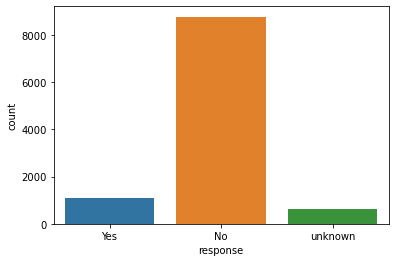

In [61]:
#Show a plot of the total number of responses
flow = ["Yes", "No", "unknown"]
ax = sns.countplot(x = "response", data= df4, order= flow)

In [62]:
#Show a plot of the response rate by the sales channel.
df4.response.value_counts()

No         8782
Yes        1085
unknown     608
Name: response, dtype: int64

In [63]:
# showing a pivot to check the values
pivot2 = pd.pivot_table(df4, index= "sales_channel", values='vehicle_class', columns='response', aggfunc='count')
pivot2

response,No,Yes,unknown
sales_channel,,,
Agent,3136,559,227
Branch,2531,237,152
Call Center,1787,156,119
Web,1328,133,110


In [64]:
df4.groupby('sales_channel').response.value_counts().unstack

<bound method Series.unstack of sales_channel  response
Agent          No          3136
               Yes          559
               unknown      227
Branch         No          2531
               Yes          237
               unknown      152
Call Center    No          1787
               Yes          156
               unknown      119
Web            No          1328
               Yes          133
               unknown      110
Name: response, dtype: int64>

Text(0.5, 1.0, 'Response rate by Sales Channel')

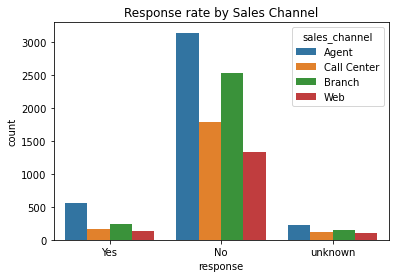

In [65]:
ax1 = sns.countplot(x = "response", data= df4, hue= 'sales_channel', order=flow)
ax1.set_title("Response rate by Sales Channel")

<AxesSubplot:xlabel='response', ylabel='total_claim_amount'>

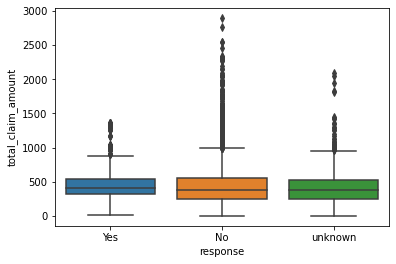

In [66]:
#### Showing a plot of the response rate by the total claim amount.
sns.boxplot(x=df4["response"], y=df4["total_claim_amount"], order=flow)

<AxesSubplot:xlabel='response', ylabel='income'>

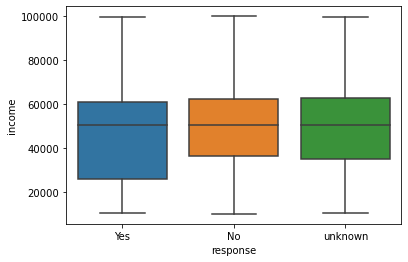

In [67]:
#### Showing a plot of the response rate by income.
sns.boxplot(x=df4["response"], y=df4["income"], order=flow)

#### Plot the Correlation Heatmap.


In [68]:
labels=['Customer Lifetime Value', 'Income', 'Monthly Premium Auto', 'Number of Open Complaints','Total Claim Amount']
df4.corr()

,customer_lifetime_value,income,monthly_premium_auto,number_of_open_complaints,total_claim_amount
customer_lifetime_value,1.000000,0.004680,0.407088,-0.030026,0.233525
income,0.004680,1.000000,-0.002439,0.012925,-0.157934
monthly_premium_auto,0.407088,-0.002439,1.000000,-0.008091,0.629640
number_of_open_complaints,-0.030026,0.012925,-0.008091,1.000000,-0.012104
total_claim_amount,0.233525,-0.157934,0.629640,-0.012104,1.000000


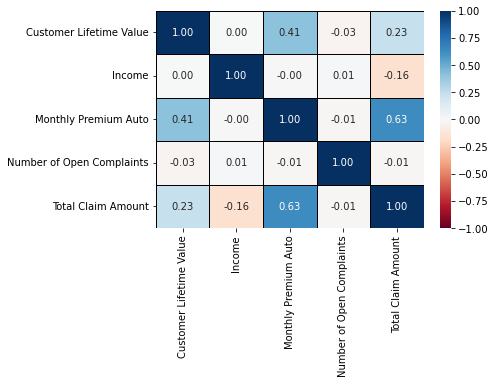

In [69]:
ax_heatmap = sns.heatmap(df4.corr(), cmap='RdBu', center=0,vmin =-1, vmax=1, annot=True, fmt='.2f',linewidth=1, xticklabels=labels, yticklabels=labels, linecolor='black')

#### Don't limit your creativity! plot any interesting findings/insights that describe some interesting facts about your data set and its variables.


1. The series with 0 values were filled with the mean after dropping the zeros, else mean of the series will be lower as zero is considered as a non-null count. The box plot and the .info() was useful indicators.
2. The Agent sales channel has been effective compared to other channels.
3. Monthly premium and claim amount have higher correlation.
4. so is Monthly premium and customer lifetime value has moderate positive correlation.



In [70]:
df4.describe()

,customer_lifetime_value,income,monthly_premium_auto,number_of_open_complaints,total_claim_amount
count,10475.000000,10475.000000,10475.000000,10475.000000,10475.000000
mean,8017.853146,50679.222738,93.187112,0.363532,434.227176
std,6903.859463,20844.178399,34.447979,0.890172,293.557044
min,1898.007675,10037.000000,61.000000,0.000000,0.099007
25%,4013.952567,34915.000000,68.000000,0.000000,266.973040
50%,5770.684097,50679.222738,83.000000,0.000000,379.897943
75%,8983.445199,62368.000000,109.000000,0.000000,547.200000
max,83325.381190,99981.000000,298.000000,5.000000,2893.239678


#### Activity 5

In [71]:
##Check the data types of the columns. Get the numeric data into dataframe called numerical and categorical columns in a dataframe called categoricals.

In [72]:
# selecting and assigning the numerical series and categorical series respectively to variables
numeric_data = df4.select_dtypes(include=[np.number])
categorical_data = df4.select_dtypes(exclude=[np.number])
df_num= numeric_data
df_cat= categorical_data

In [73]:
df_num

,customer_lifetime_value,income,monthly_premium_auto,number_of_open_complaints,total_claim_amount
0,4809.216960,48029.000000,61,0.0,292.800000
1,2228.525238,50679.222738,64,0.0,744.924331
2,14947.917300,22139.000000,100,0.0,480.000000
3,22332.439460,49078.000000,97,0.0,484.013411
4,9025.067525,23675.000000,117,0.0,707.925645
...,...,...,...,...,...
10905,15563.369440,50679.222738,253,0.0,1214.400000
10906,5259.444853,61146.000000,65,0.0,273.018929
10907,23893.304100,39837.000000,201,0.0,381.306996
10908,11971.977650,64195.000000,158,4.0,618.288849


In [74]:
df_cat

,state,education,gender,policy_type,vehicle_class,sales_channel,response
0,Arizona,College,M,Corporate Auto,Four-Door Car,Agent,No
1,California,College,F,Personal Auto,Four-Door Car,Call Center,No
2,Washington,Bachelor,M,Personal Auto,SUV,Call Center,No
3,Oregon,College,M,Corporate Auto,Four-Door Car,Branch,Yes
4,Oregon,Bachelor,F,Personal Auto,Four-Door Car,Branch,No
...,...,...,...,...,...,...,...
10905,Nevada,Bachelor,F,Personal Auto,Luxury Car,Web,No
10906,Oregon,College,F,Personal Auto,Four-Door Car,Branch,No
10907,Arizona,Bachelor,F,Corporate Auto,Luxury SUV,Web,No
10908,California,College,F,Personal Auto,SUV,Branch,No


#### Using seaborn library to construct distribution plots for the numerical variables

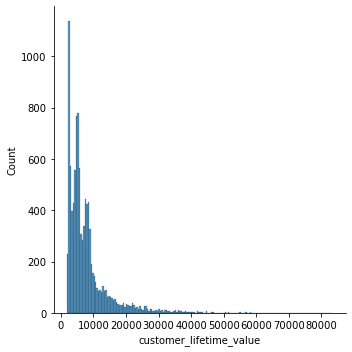

In [75]:
ax5= sns.displot(df_num, x="customer_lifetime_value")

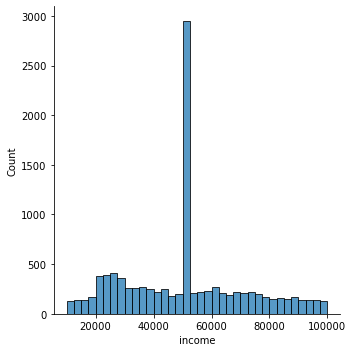

In [76]:
ax6= sns.displot(df_num, x="income") # The tall bar represents replacement of zeros with the mean.

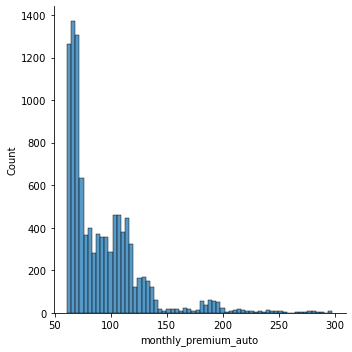

In [77]:
ax7= sns.displot(df_num, x="monthly_premium_auto")

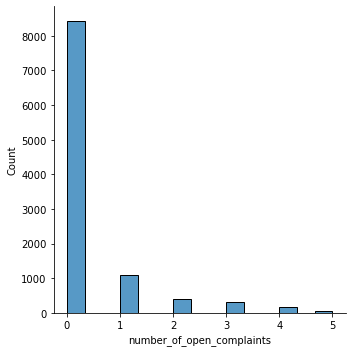

In [78]:
ax8= sns.displot(df_num, x="number_of_open_complaints")

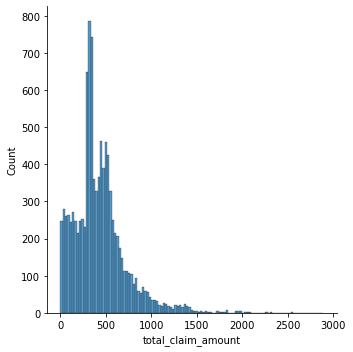

In [79]:
ax7= sns.displot(df_num, x="total_claim_amount")

In [80]:
#Use seaborn library to construct distribution plots for the numerical variables

#### Do the distributions for different numerical variables look like a normal distribution
#### For the numerical variables, check the multicollinearity between the features. Please note that we will use the column total_claim_amount later as the target variable.
#### Drop one of the two features that show a high correlation between them (greater than 0.9). Write code for both the correlation matrix and for seaborn heatmap. If there is no pair of features that have a high correlation, then do not drop any features

#### Use Matplotlib to construct histograms

array([[<AxesSubplot:title={'center':'income'}>]], dtype=object)

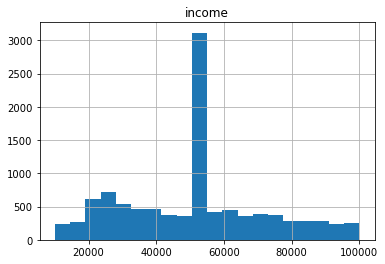

In [81]:
df_num.hist(column='income', bins= 20)

array([[<AxesSubplot:title={'center':'total_claim_amount'}>]],
      dtype=object)

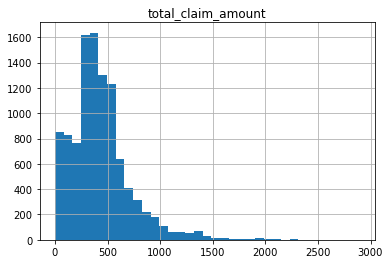

In [82]:
df_num.hist(column='total_claim_amount', bins= 35)

array([[<AxesSubplot:title={'center':'customer_lifetime_value'}>]],
      dtype=object)

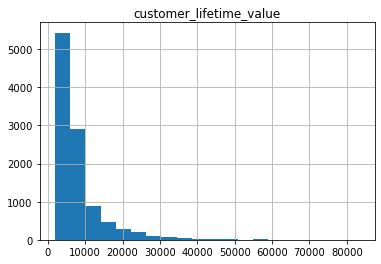

In [83]:
df_num.hist(column='customer_lifetime_value', bins= 20)

array([[<AxesSubplot:title={'center':'monthly_premium_auto'}>]],
      dtype=object)

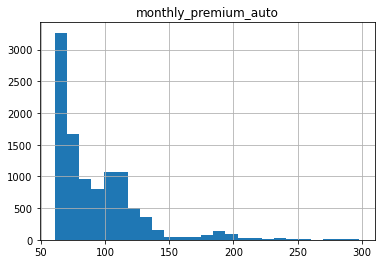

In [84]:
df_num.hist(column='monthly_premium_auto', bins= 25)

array([[<AxesSubplot:title={'center':'number_of_open_complaints'}>]],
      dtype=object)

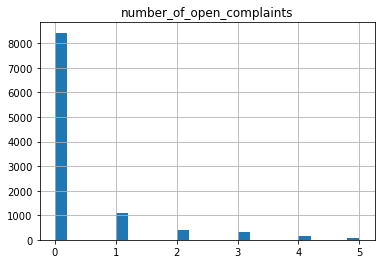

In [85]:
df_num.hist(column='number_of_open_complaints', bins= 25)

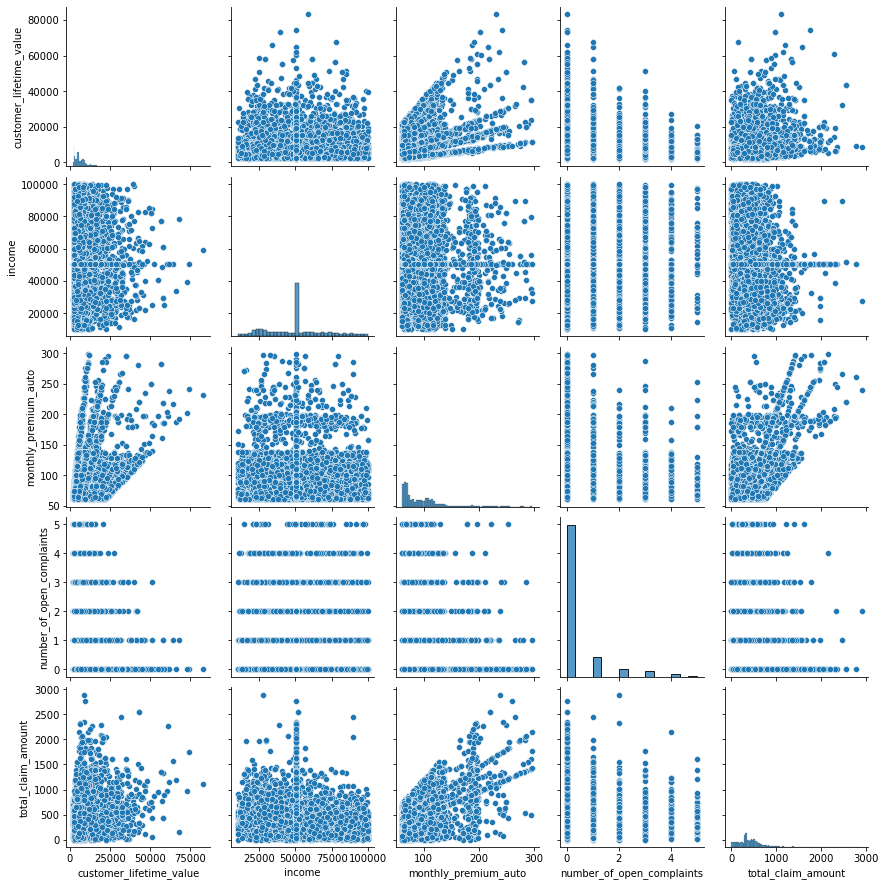

In [86]:
sns.pairplot(df4)

#### miscellaneous workings for my own reference for further work on this file

In [87]:
ca_df_unique.region.value_counts()

west          3045
central       2532
north_west    2512
east           792
Name: region, dtype: int64

In [88]:
ca_df_unique.policy_type.value_counts()

personal auto     6562
corporate auto    1941
special auto       378
Name: policy_type, dtype: int64

In [89]:
ca_df_unique.describe()

,customer_lifetime_value,income,monthly_premium_auto,number_of_open_complaints,total_claim_amount
count,8881.000000,8881.000000,8881.000000,8881.000000,8881.000000
mean,6365.453035,50707.813406,110.183876,0.384867,430.073008
std,6840.340802,20943.969712,585.800130,0.908204,290.983527
min,200.435070,10037.000000,61.000000,0.000000,0.099007
25%,2419.306466,34645.000000,68.000000,0.000000,263.825690
50%,4834.710493,50707.813406,83.000000,0.000000,374.716271
75%,8066.073765,62455.000000,109.000000,0.000000,545.291103
max,83325.381190,99981.000000,35354.000000,5.000000,2893.239678


In [90]:
pivot1 = pd.pivot_table(ca_df_unique, index= "region", values ="income", columns="vehicle_class")
pivot1

vehicle_class,four-door car,luxury car,luxury suv,sports car,suv,two-door car
region,,,,,,
central,50992.729478,51085.647892,50000.587754,49622.417475,48868.083310,50799.422333
east,50762.001065,44816.680027,43374.201490,55603.945577,51389.681035,52876.465127
north_west,50750.638193,54246.625236,51385.667588,48280.869538,50429.951291,51476.558129
west,50143.196342,54125.981750,45564.500234,49269.526884,51563.849924,51839.420760


In [91]:
pivot2 = pd.pivot_table(ca_df_unique, index= "vehicle_class", columns="region")
pivot2

customer_lifetime_value                              \
region                        central          east    north_west   
vehicle_class                                                       
four-door car             5021.590159   4888.883043   5240.373963   
luxury car               14168.222742  14814.818359  11743.121554   
luxury suv               13499.274377  21625.807746  14251.018468   
sports car                7412.761242   7712.557005   8997.504205   
suv                       8677.539823   9186.274077   8101.194436   
two-door car              5106.581950   4714.460849   5228.409702   

                                   income                              \
region                 west       central          east    north_west   
vehicle_class                                                           
four-door car   5300.799453  50992.729478  50762.001065  50750.638193   
luxury car     14938.604385  51085.647892  44816.680027  54246.625236   
luxury suv     13463.354671  50000.587754  43374.201490  51385.667588   
sports car      9823.902677  49622.417475  55603.945577  48280.869538   
suv             8538.256020  48868.083310  51389.681035  50429.951291   
two-door car    5758.719624  50799.422333  52876.465127  51476.558129   

                            monthly_premium_auto                          \
region                 west              central        east  north_west   
vehicle_class                                                              
four-door car  50143.196342            77.531130  380.810185   77.484388   
luxury car     54125.981750           205.909091  231.062500  218.021739   
luxury suv     45564.500234           210.960000  219.666667  213.915254   
sports car     49269.526884           122.381295  121.333333  122.137405   
suv            51563.849924           119.991561  126.022901  120.435743   
two-door car   51839.420760            76.977099  187.744444   76.141777   

                          number_of_open_complaints                       \
region               west                   central      east north_west   
vehicle_class                                                              
four-door car   77.369579                  0.421983  0.412037   0.365893   
luxury car     205.111111                  0.477273  0.500000   0.260870   
luxury suv     212.258065                  0.320000  0.333333   0.372881   
sports car     121.745562                  0.330935  0.625000   0.374046   
suv            120.244300                  0.388186  0.374046   0.395582   
two-door car    77.510815                  0.368321  0.377778   0.342155   

                        total_claim_amount                            \
region             west            central         east   north_west   
vehicle_class                                                          
four-door car  0.401294         347.935757   329.926943   349.401295   
luxury car     0.444444         998.836290  1316.355263  1187.916844   
luxury suv     0.370968        1128.196061  1236.726183  1030.877712   
sports car     0.289941         535.049591   471.190814   577.863285   
suv            0.324104         578.061425   527.886241   553.999343   
two-door car   0.424293         358.584353   317.821560   344.734463   

                            
region                west  
vehicle_class               
four-door car   351.598471  
luxury car     1121.837877  
luxury suv     1076.773032  
sports car      584.153421  
suv             575.318676  
two-door car    348.490950

In [92]:
pivot3 = pd.pivot_table(ca_df_unique, index= "vehicle_class", values='customer_lifetime_value', columns='gender')
pivot3
# women in general in all car segments have higher customer_lifetime_value except luxury car and negligibly in suv

gender,female,male,unknown
vehicle_class,,,
four-door car,5300.001833,5164.553258,799.827760
luxury car,12934.132848,14619.753133,5816.655350
luxury suv,15424.765784,13344.417343,1699.952735
sports car,8944.548847,8736.478942,836.800134
suv,8532.260235,8642.654274,1155.955237
two-door car,5500.872795,5250.541834,533.687377


In [93]:
pivot3 = pd.pivot_table(ca_df_unique, index= "region", values='customer_lifetime_value', columns='gender')
pivot3
# men have higher customer_lifetime_value in east and north_west. the contrary in central region. but no big diff in west

gender,female,male,unknown
region,,,
central,6572.437905,5910.173315,679.331342
east,5710.407880,6482.851826,1961.461646
north_west,6319.915839,6547.208023,786.072043
west,6700.778905,6708.683688,890.287401


In [94]:
pivot3 = pd.pivot_table(ca_df_unique, index= "region", values='customer_lifetime_value', columns='gender', aggfunc='count')
pivot3
# more women in all regions, especially north_west and central. minimal diff in west

gender,female,male,unknown
region,,,
central,1289,1211,32
east,411,373,8
north_west,1267,1201,44
west,1515,1492,38


In [95]:
pivot3 = pd.pivot_table(ca_df_unique, index= "region", values='number_of_open_complaints', columns='gender', aggfunc='sum')
pivot3
# more open complaints from woman in all regions, especially north_west.

gender,female,male,unknown
region,,,
central,487,502,20
east,166,152,3
north_west,492,404,22
west,583,569,18


In [96]:
pivot3 = pd.pivot_table(ca_df_unique, index= "region", values='vehicle_class', columns='policy_type', aggfunc='count')
pivot3
# more number of personal autos used in all regions

policy_type,corporate auto,personal auto,special auto
region,,,
central,522,1898,112
east,157,604,31
north_west,538,1852,122
west,724,2208,113


In [97]:
pivot3 = pd.pivot_table(ca_df_unique, index= "region", values='income', columns='policy_type', aggfunc='sum')
pivot3
# 

policy_type,corporate auto,personal auto,special auto
region,,,
central,2.741748e+07,9.478473e+07,5.567014e+06
east,7.931809e+06,3.121554e+07,1.473580e+06
north_west,2.711098e+07,9.397157e+07,6.502113e+06
west,3.635709e+07,1.121475e+08,5.856736e+06


In [98]:
pivot3 = pd.pivot_table(ca_df_unique, index= "vehicle_class", values='customer_lifetime_value', columns='policy_type')
pivot3
# higher value of customer_lifetime_value from corporate auto in almost all segments except luxury suv and suv. 

policy_type,corporate auto,personal auto,special auto
vehicle_class,,,
four-door car,5230.543695,5149.568071,5088.811270
luxury car,14513.240007,13727.304771,10798.869043
luxury suv,13409.865702,14165.388008,17422.211347
sports car,8888.030178,8559.220588,10863.271146
suv,8204.133435,8597.584541,8332.286888
two-door car,5383.902244,5201.167891,7164.804553
